In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
ensemble_result = pd.DataFrame(np.load("y_pred_rf.npy"), columns=['predicted_fraud_p'])

In [6]:
file_path = "df_imputed.csv"
data = pd.read_csv(file_path)

In [7]:
data["fraud_reported"].value_counts()

N    1482
Y     247
Name: fraud_reported, dtype: int64

# Applying Bayes' Theorem to determine the probability of fraud cases

In [30]:
prior = data["fraud_reported"].value_counts()["Y"]/data.shape[0]
prior

0.14285714285714285

In [28]:
ensemble_result.head(10)

,predicted_fraud_p
0,1.000000
1,0.132328
2,0.000000
3,0.000000
4,1.000000
5,1.000000
6,0.000000
7,0.000000
8,1.000000
9,0.000000


In [29]:
def calculate_posterior(ensemble_result, prior):
    
    likelihood_fraud = ensemble_result['predicted_fraud_p']
    likelihood_non_fraud = 1 - ensemble_result['predicted_fraud_p']

    marginal = prior * likelihood_fraud + (1 - prior) * likelihood_non_fraud
    posterior = (prior * likelihood_fraud) / marginal
    
    return posterior

# Calculate posterior probabilities
ensemble_result['posterior_probability'] = calculate_posterior(ensemble_result, prior)

print(ensemble_result)

     predicted_fraud_p  posterior_probability
0             1.000000               1.000000
1             0.132328               0.024788
2             0.000000               0.000000
3             0.000000               0.000000
4             1.000000               1.000000
..                 ...                    ...
588           0.000000               0.000000
589           0.000000               0.000000
590           1.000000               1.000000
591           0.000000               0.000000
592           1.000000               1.000000

[593 rows x 2 columns]


In [31]:
data

,Unnamed: 0.1,Unnamed: 0,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,0,0,267,40,426708,2009-10-09,IL,250/500,500,1155.53,...,NO,5670,1260,630,3780,Ford,F150,1997,N,NaN
1,1,1,322,44,769602,2004-12-19,IL,100/300,1000,1156.19,...,?,49400,9880,4940,34580,Jeep,Wrangler,2010,N,NaN
2,2,2,259,45,608443,2006-12-21,IL,500/1000,2000,1175.07,...,NO,87780,7980,7980,71820,Honda,CRV,2011,N,NaN
3,3,3,446,61,259792,1999-04-07,IL,100/300,1000,1232.79,...,YES,70500,7050,14100,49350,Suburu,Forrestor,2007,N,NaN
4,4,4,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,1724,1724,85,25,159768,2008-09-03,IN,250/500,500,1259.02,...,?,5640,940,940,3760,Nissan,Ultima,2005,N,NaN
1725,1725,1725,131,33,432740,1990-10-09,IL,100/300,2000,1081.17,...,NO,4900,490,490,3920,Toyota,Camry,2010,N,NaN
1726,1726,1726,194,35,275092,2012-03-14,IL,500/1000,500,1416.24,...,?,5940,1080,540,4320,Nissan,Pathfinder,2003,N,NaN
1727,1727,1727,210,37,218684,2006-08-05,IN,500/1000,2000,1048.46,...,?,7080,1180,590,5310,Dodge,RAM,1999,N,NaN


# Determining the expected total claim amount

In [33]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'months_as_customer', 'age',
       'policy_number', 'policy_bind_date', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [36]:
# Summarize the claim columns
data[['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim']].describe()

,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1729.000000,1729.000000,1729.000000,1729.000000
mean,51597.056102,7327.998843,7234.366686,37034.690573
std,26888.385942,4928.820188,4803.184655,19237.761635
min,100.000000,0.000000,0.000000,70.000000
25%,39690.000000,3900.000000,4070.000000,27860.000000
50%,57700.000000,6770.000000,6720.000000,41670.000000
75%,70290.000000,11180.000000,10720.000000,50050.000000
max,114920.000000,21450.000000,21810.000000,79560.000000


In [41]:
# Verify the sum of claim amount columns

total_sum = data['total_claim_amount'].sum()

sum_injury_claim = data['injury_claim'].sum()
sum_property_claim = data['property_claim'].sum()
sum_vehicle_claim = data['vehicle_claim'].sum()

subtotal_sum = sum_injury_claim + sum_property_claim + sum_vehicle_claim

print("Total sum of 'total_claim_amount':", total_sum)
print("Total sum of 'injury_claim', 'property_claim', and 'vehicle_claim':", subtotal_sum)

Total sum of 'total_claim_amount': 89211310
Total sum of 'injury_claim', 'property_claim', and 'vehicle_claim': 89211310


In [55]:
hist, bins = np.histogram(data['total_claim_amount'], bins=30)
histogram_df = pd.DataFrame({'Bin Range Start': bins[:-1], 'Bin Range End': bins[1:], 'Frequency': hist})
histogram_df.head(10)

,Bin Range Start,Bin Range End,Frequency
0,100.000000,3927.333333,75
1,3927.333333,7754.666667,238
2,7754.666667,11582.000000,27
3,11582.000000,15409.333333,0
4,15409.333333,19236.666667,3
5,19236.666667,23064.000000,0
6,23064.000000,26891.333333,3
7,26891.333333,30718.666667,18
8,30718.666667,34546.000000,35
9,34546.000000,38373.333333,27


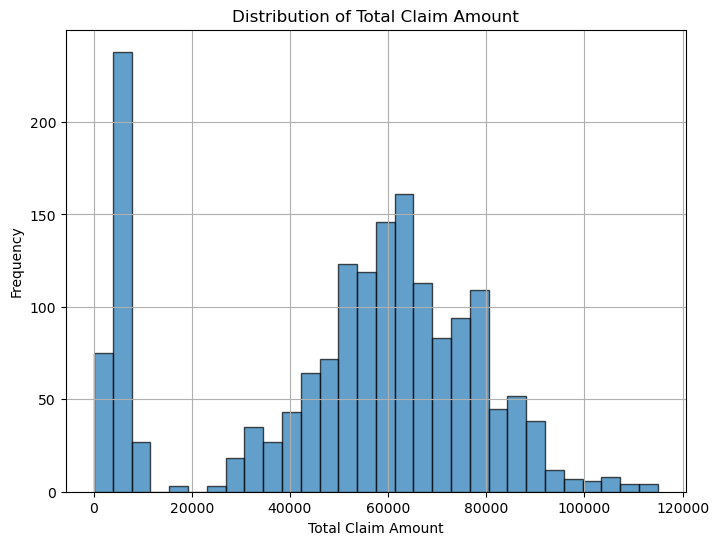

In [56]:
plt.figure(figsize=(8, 6))
plt.hist(data['total_claim_amount'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Total Claim Amount')
plt.xlabel('Total Claim Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()